## The First Step--HMM Model

Assume that we know litte about how meteorological conditions and other pollutants affect the concentration of PM2.5(In fact, it's a hard problem!). We want a simple model to make the prediction, simply enough, just predicted whether the concentration will increase or decrease.  <br>

Recalled that we have a perfect POS tagger based on Hidden Markov Model. In this HMM model, the hidden state is POS tags, what we can observed is the sequence of words. Why not make a little bit change?  <br>

In our model, the hidden state is how PM2.5 concentration change(Increase or decrease?), the observation is meteorological conditions and other pollutants represented by AQI(Air quality index). **Given AQI and weather forcast, we can prediction how PM2.5 change!**

In [7]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Before we move, let's do some cleanup and calculation

In [8]:
# read data
data = pd.read_csv('data/cleanup/Shunyi.csv', index_col=['date'])
data

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM
date,,,,,,,,,,,,
2013-03-01 00:00:00,3.0,6.0,3.0,8.0,300.0,44.0,-0.9,1025.8,-20.5,0.0,NW,9.3
2013-03-01 01:00:00,12.0,12.0,3.0,7.0,300.0,47.0,-1.1,1026.1,-21.3,0.0,NW,9.4
2013-03-01 02:00:00,14.0,14.0,NaN,7.0,200.0,22.0,-1.7,1026.2,-23.0,0.0,NW,8.6
2013-03-01 03:00:00,12.0,12.0,3.0,5.0,NaN,NaN,-2.1,1027.3,-23.3,0.0,NW,6.6
2013-03-01 04:00:00,12.0,12.0,3.0,NaN,200.0,11.0,-2.4,1027.7,-22.9,0.0,NW,4.5
...,...,...,...,...,...,...,...,...,...,...,...,...
2017-02-28 19:00:00,27.0,72.0,8.0,92.0,800.0,16.0,10.3,1014.2,-12.4,0.0,W,1.8
2017-02-28 20:00:00,47.0,55.0,17.0,86.0,1100.0,19.0,9.8,1014.5,-9.9,0.0,NW,1.5
2017-02-28 21:00:00,18.0,28.0,4.0,30.0,500.0,64.0,9.1,1014.6,-12.7,0.0,NE,1.7


In [9]:
# convert index to datetime object
data.index = pd.to_datetime(data.index)
data.index

DatetimeIndex(['2013-03-01 00:00:00', '2013-03-01 01:00:00',
               '2013-03-01 02:00:00', '2013-03-01 03:00:00',
               '2013-03-01 04:00:00', '2013-03-01 05:00:00',
               '2013-03-01 06:00:00', '2013-03-01 07:00:00',
               '2013-03-01 08:00:00', '2013-03-01 09:00:00',
               ...
               '2017-02-28 14:00:00', '2017-02-28 15:00:00',
               '2017-02-28 16:00:00', '2017-02-28 17:00:00',
               '2017-02-28 18:00:00', '2017-02-28 19:00:00',
               '2017-02-28 20:00:00', '2017-02-28 21:00:00',
               '2017-02-28 22:00:00', '2017-02-28 23:00:00'],
              dtype='datetime64[ns]', name='date', length=35064, freq=None)

In [4]:
import math
# shift one our to calculate change rate
data_new = data.copy()
data_new = data_new.drop(columns=['wd'])
data_new['PM1hour'] = data_new['PM2.5'].shift(periods=-1)
data_new['RH'] = data_new.apply(lambda x: math.exp(17.27*x.DEWP/(237.7+x.DEWP)-17.27*x.TEMP/(237.7+x.TEMP)), axis=1)
data_new['PM2.5Change'] = data_new.apply(lambda x: x.PM1hour - x['PM2.5'] if ((not pd.isna(x.PM1hour)) and (not pd.isna(x['PM2.5']))) else np.nan, axis=1)
data_new = data_new.drop(columns=['TEMP', 'DEWP'])
data_new = data_new.dropna()

data_new

,PM2.5,PM10,SO2,NO2,CO,O3,PRES,RAIN,WSPM,PM1hour,RH,PM2.5Change
date,,,,,,,,,,,,
2013-03-01 00:00:00,3.0,6.0,3.0,8.0,300.0,44.0,1025.8,0.0,9.3,12.0,0.209222,9.0
2013-03-01 01:00:00,12.0,12.0,3.0,7.0,300.0,47.0,1026.1,0.0,9.4,14.0,0.197983,2.0
2013-03-01 05:00:00,11.0,11.0,3.0,7.0,200.0,45.0,1028.2,0.0,1.7,12.0,0.209214,1.0
2013-03-01 06:00:00,12.0,12.0,3.0,9.0,300.0,74.0,1029.0,0.0,1.6,13.0,0.247706,1.0
2013-03-01 07:00:00,13.0,13.0,3.0,23.0,300.0,59.0,1030.5,0.0,1.7,8.0,0.217901,-5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2017-02-28 18:00:00,15.0,35.0,6.0,39.0,500.0,67.0,1013.5,0.0,1.3,27.0,0.168719,12.0
2017-02-28 19:00:00,27.0,72.0,8.0,92.0,800.0,16.0,1014.2,0.0,1.8,47.0,0.188669,20.0
2017-02-28 20:00:00,47.0,55.0,17.0,86.0,1100.0,19.0,1014.5,0.0,1.5,18.0,0.238267,-29.0


In [5]:
data_new.describe()

,PM2.5,PM10,SO2,NO2,CO,O3,PRES,RAIN,WSPM,PM1hour,RH,PM2.5Change
count,30347.000000,30347.000000,30347.000000,30347.000000,30347.000000,30347.000000,30347.000000,30347.000000,30347.000000,30347.000000,30347.000000,30347.000000
mean,79.858256,99.872989,14.150727,45.289622,1211.743962,54.715294,1013.711738,0.054338,1.817478,80.027943,0.524195,0.169687
std,81.580732,90.012758,20.064042,31.282955,1168.237281,53.935632,10.112375,0.703009,1.299662,81.709628,0.244835,20.968978
min,2.000000,2.000000,1.000000,2.000000,100.000000,0.214200,988.000000,0.000000,0.000000,2.000000,0.049325,-497.000000
25%,19.000000,31.000000,2.000000,20.000000,400.000000,10.000000,1005.500000,0.000000,1.000000,19.000000,0.309234,-5.000000
50%,55.000000,78.000000,5.000000,39.000000,900.000000,44.000000,1013.500000,0.000000,1.500000,55.000000,0.520639,0.000000
75%,112.000000,140.000000,18.000000,64.000000,1600.000000,77.000000,1021.700000,0.000000,2.300000,112.000000,0.731076,6.000000
max,762.000000,999.000000,207.000000,258.000000,10000.000000,340.000000,1042.800000,37.300000,12.800000,816.000000,1.000000,409.000000


### Current status
Now we have data we want(with 1 hour change), we need to describe meteorological conditions and AQI from our data.

To be simple, we classify AQI into three class (good/fair/unhealthy). See [there/HJ 633—2012](https://wenku.baidu.com/view/7ad5384fe45c3b3567ec8bc5.html) to learn how to calculate AQI.(We adapted it into a super simple version, modified it accordingly)

The meteorological conditions also be simplified. Below is how we classified them:<br>
RH(Relative Humidity): Low/Moderate/High<br>
Rain level: Heavy rain/Rainy/Light rain/No rain<br>
Wind Speed: Strong/Gentel/Light


In [6]:
# Calculate AQI

def pollutionStatus(pm25, pm10, so2, no2, co, o3):
    '''Return current air quality
    :param concentration of pollutant
    :return air quality
    '''
    good_count = 0
    fair_count = 0
    Unhealthy = 0
    
    # check pm2.5 first
    if pm25 > 100:
        Unhealthy += 1
    elif pm25 < 35:
        good_count += 1
    else:
        fair_count += 1
    
    # check pm10
    if pm10 > 140:
        Unhealthy += 1
    elif pm10 < 50:
        good_count += 1
    else:
        fair_count += 1
        
    # check SO2
    if so2 > 150:
        Unhealthy += 1
    elif so2 < 50:
        good_count += 1
    else:
        fair_count += 1
        
    # check NO2
    if no2 > 80:
        Unhealthy += 1
    elif no2 < 40:
        good_count += 1
    else:
        fair_count += 1
    
    # check CO ug->mg
    if co > 1000:
        Unhealthy += 1
    elif co < 500:
        good_count += 1
    else:
        fair_count += 1
    
    # check O3
    if o3 > 200:
        Unhealthy += 1
    elif o3 < 160:
        good_count += 1
    else:
        fair_count += 1
        
    if Unhealthy > 0:
        return 'Unhealthy'
    elif fair_count > 0:
        return 'Fair'
    else:
        return 'Good'
        

In [7]:
data_new['AQI'] = data_new.apply(lambda x: pollutionStatus(x['PM2.5'], x['PM10'], x['SO2'], x['NO2'], x['CO'], x['O3']), axis=1)
data_new

,PM2.5,PM10,SO2,NO2,CO,O3,PRES,RAIN,WSPM,PM1hour,RH,PM2.5Change,AQI
date,,,,,,,,,,,,,
2013-03-01 00:00:00,3.0,6.0,3.0,8.0,300.0,44.0,1025.8,0.0,9.3,12.0,0.209222,9.0,Good
2013-03-01 01:00:00,12.0,12.0,3.0,7.0,300.0,47.0,1026.1,0.0,9.4,14.0,0.197983,2.0,Good
2013-03-01 05:00:00,11.0,11.0,3.0,7.0,200.0,45.0,1028.2,0.0,1.7,12.0,0.209214,1.0,Good
2013-03-01 06:00:00,12.0,12.0,3.0,9.0,300.0,74.0,1029.0,0.0,1.6,13.0,0.247706,1.0,Good
2013-03-01 07:00:00,13.0,13.0,3.0,23.0,300.0,59.0,1030.5,0.0,1.7,8.0,0.217901,-5.0,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-02-28 18:00:00,15.0,35.0,6.0,39.0,500.0,67.0,1013.5,0.0,1.3,27.0,0.168719,12.0,Fair
2017-02-28 19:00:00,27.0,72.0,8.0,92.0,800.0,16.0,1014.2,0.0,1.8,47.0,0.188669,20.0,Unhealthy
2017-02-28 20:00:00,47.0,55.0,17.0,86.0,1100.0,19.0,1014.5,0.0,1.5,18.0,0.238267,-29.0,Unhealthy


In [9]:

# RH status
def RH_status(rh):
    if rh > 0.75:
        return 'High RH'
    elif rh < 0.3:
        return 'Low RH'
    else:
        return 'Moderate RH'
    
# rain level:
def Rain_level(rain):
    if rain > 2.5:
        return 'Heavy rain'
    elif rain > 0.4:
        return 'Rainy'
    elif rain > 0:
        return 'Light rain'
    else:
        return 'No rain'
    
# wind speed level:
def ws_level(ws):
    if ws > 9:
        return 'Strong wind'
    elif ws > 3.4:
        return 'Gentle wind'
    else:
        return 'Light wind'

In [10]:
data_new['status'] = data_new.apply(lambda x: x.AQI+' AQI '+ RH_status(x.RH)+' '+ Rain_level(x.RAIN)+' '+ ws_level(x.WSPM), axis = 1)
data_new

,PM2.5,PM10,SO2,NO2,CO,O3,PRES,RAIN,WSPM,PM1hour,RH,PM2.5Change,AQI,status
date,,,,,,,,,,,,,,
2013-03-01 00:00:00,3.0,6.0,3.0,8.0,300.0,44.0,1025.8,0.0,9.3,12.0,0.209222,9.0,Good,Good AQI Low RH No rain Strong wind
2013-03-01 01:00:00,12.0,12.0,3.0,7.0,300.0,47.0,1026.1,0.0,9.4,14.0,0.197983,2.0,Good,Good AQI Low RH No rain Strong wind
2013-03-01 05:00:00,11.0,11.0,3.0,7.0,200.0,45.0,1028.2,0.0,1.7,12.0,0.209214,1.0,Good,Good AQI Low RH No rain Light wind
2013-03-01 06:00:00,12.0,12.0,3.0,9.0,300.0,74.0,1029.0,0.0,1.6,13.0,0.247706,1.0,Good,Good AQI Low RH No rain Light wind
2013-03-01 07:00:00,13.0,13.0,3.0,23.0,300.0,59.0,1030.5,0.0,1.7,8.0,0.217901,-5.0,Good,Good AQI Low RH No rain Light wind
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-02-28 18:00:00,15.0,35.0,6.0,39.0,500.0,67.0,1013.5,0.0,1.3,27.0,0.168719,12.0,Fair,Fair AQI Low RH No rain Light wind
2017-02-28 19:00:00,27.0,72.0,8.0,92.0,800.0,16.0,1014.2,0.0,1.8,47.0,0.188669,20.0,Unhealthy,Unhealthy AQI Low RH No rain Light wind
2017-02-28 20:00:00,47.0,55.0,17.0,86.0,1100.0,19.0,1014.5,0.0,1.5,18.0,0.238267,-29.0,Unhealthy,Unhealthy AQI Low RH No rain Light wind


In [11]:
# decribe change as increase or decrease
data_new['Change'] = data_new.apply(lambda x: 'Increase' if x['PM2.5Change'] > 0 else 'Decrease', axis=1)
data_new

,PM2.5,PM10,SO2,NO2,CO,O3,PRES,RAIN,WSPM,PM1hour,RH,PM2.5Change,AQI,status,Change
date,,,,,,,,,,,,,,,
2013-03-01 00:00:00,3.0,6.0,3.0,8.0,300.0,44.0,1025.8,0.0,9.3,12.0,0.209222,9.0,Good,Good AQI Low RH No rain Strong wind,Increase
2013-03-01 01:00:00,12.0,12.0,3.0,7.0,300.0,47.0,1026.1,0.0,9.4,14.0,0.197983,2.0,Good,Good AQI Low RH No rain Strong wind,Increase
2013-03-01 05:00:00,11.0,11.0,3.0,7.0,200.0,45.0,1028.2,0.0,1.7,12.0,0.209214,1.0,Good,Good AQI Low RH No rain Light wind,Increase
2013-03-01 06:00:00,12.0,12.0,3.0,9.0,300.0,74.0,1029.0,0.0,1.6,13.0,0.247706,1.0,Good,Good AQI Low RH No rain Light wind,Increase
2013-03-01 07:00:00,13.0,13.0,3.0,23.0,300.0,59.0,1030.5,0.0,1.7,8.0,0.217901,-5.0,Good,Good AQI Low RH No rain Light wind,Decrease
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-02-28 18:00:00,15.0,35.0,6.0,39.0,500.0,67.0,1013.5,0.0,1.3,27.0,0.168719,12.0,Fair,Fair AQI Low RH No rain Light wind,Increase
2017-02-28 19:00:00,27.0,72.0,8.0,92.0,800.0,16.0,1014.2,0.0,1.8,47.0,0.188669,20.0,Unhealthy,Unhealthy AQI Low RH No rain Light wind,Increase
2017-02-28 20:00:00,47.0,55.0,17.0,86.0,1100.0,19.0,1014.5,0.0,1.5,18.0,0.238267,-29.0,Unhealthy,Unhealthy AQI Low RH No rain Light wind,Decrease


Now, we are ready to go, let's build a HMM model that 'Change' are hidden states and 'status' can be observed

In [12]:
from collections import Counter, defaultdict, namedtuple, OrderedDict
from pomegranate import State, HiddenMarkovModel, DiscreteDistribution

In [13]:
# here, the hidden state is 'change'(how PM2.5 will change in next hour), the observation is 'status'(AQI+weather)

# First, let's see hidden state counter
unigram = Counter(data_new.Change)
unigram


Counter({'Increase': 14819, 'Decrease': 15528})

In [14]:
# then, exam which hidden state followed by other states

bi = [(data_new.Change[i], data_new.Change[i+1]) for i in range(0,len(data_new.Change)-2,1)]

bigram = Counter(bi)
bigram

Counter({('Increase', 'Increase'): 8375,
         ('Increase', 'Decrease'): 6444,
         ('Decrease', 'Decrease'): 9083,
         ('Decrease', 'Increase'): 6443})

In [15]:
# pair count, given 'change', the probability of observing certain 'status'

def pair_counts(change, status):
    d = defaultdict(lambda: defaultdict(int))
    for c, s in zip(change, status):
        d[c][s] += 1
    return d

pair_count = pair_counts(data_new.Change, data_new.status)
pair_count

defaultdict(<function __main__.pair_counts.<locals>.<lambda>()>,
            {'Increase': defaultdict(int,
                         {'Good AQI Low RH No rain Strong wind': 2,
                          'Good AQI Low RH No rain Light wind': 1014,
                          'Fair AQI Moderate RH No rain Light wind': 2586,
                          'Fair AQI Low RH No rain Light wind': 920,
                          'Unhealthy AQI Low RH No rain Light wind': 568,
                          'Unhealthy AQI Moderate RH No rain Light wind': 4488,
                          'Unhealthy AQI Low RH No rain Gentle wind': 101,
                          'Fair AQI Low RH No rain Gentle wind': 288,
                          'Unhealthy AQI Moderate RH No rain Gentle wind': 78,
                          'Unhealthy AQI High RH Light rain Light wind': 92,
                          'Unhealthy AQI High RH No rain Light wind': 1841,
                          'Good AQI Moderate RH No rain Light wind': 887,
      

In [16]:
# from above, yielding the emission probability

to_pass_states = []
for change, status in pair_count.items():
    total = float(sum(status.values()))
    distribution = {s: count/total for s, count in status.items()}
    change_emissions = DiscreteDistribution(distribution)
    change_state = State(change_emissions, name=change)
    to_pass_states.append(change_state)
    
to_pass_states

[{
     "class" : "State",
     "distribution" : {
         "class" : "Distribution",
         "dtype" : "str",
         "name" : "DiscreteDistribution",
         "parameters" : [
             {
                 "Good AQI Low RH No rain Strong wind" : 0.000134961873270801,
                 "Good AQI Low RH No rain Light wind" : 0.0684256697482961,
                 "Fair AQI Moderate RH No rain Light wind" : 0.17450570213914568,
                 "Fair AQI Low RH No rain Light wind" : 0.06208246170456846,
                 "Unhealthy AQI Low RH No rain Light wind" : 0.03832917200890748,
                 "Unhealthy AQI Moderate RH No rain Light wind" : 0.30285444361967745,
                 "Unhealthy AQI Low RH No rain Gentle wind" : 0.006815574600175451,
                 "Fair AQI Low RH No rain Gentle wind" : 0.019434509750995345,
                 "Unhealthy AQI Moderate RH No rain Gentle wind" : 0.005263513057561239,
                 "Unhealthy AQI High RH Light rain Light wind" : 0.006

In [17]:
# now add states into model
hmm_model = HiddenMarkovModel(name="base-hmm-model")

In [18]:


# add start probability
start_prob = {}

for change in pair_count.keys():
    start_prob[change] = unigram[change] / sum(unigram.values())

# start_prob
for status in to_pass_states:
    hmm_model.add_transition(hmm_model.start, status, start_prob[status.name])


In [19]:
start_prob

{'Increase': 0.4883184499291528, 'Decrease': 0.5116815500708471}

In [20]:
# add transition probability
transition_prob_pair={}

for changes in bigram.keys():
    transition_prob_pair[changes] = bigram.get(changes) / unigram[changes[0]]

# transition_prob_pair

for change in to_pass_states:
    for next_change in to_pass_states:
        hmm_model.add_transition(change, next_change, transition_prob_pair[(change.name, next_change.name)])

In [21]:
# add the end probability

end_prob = {}

for change in pair_count.keys():
    end_prob[change] = unigram[change] / sum(unigram.values())

for status in to_pass_states:
    hmm_model.add_transition(status, hmm_model.end, end_prob[status.name])

In [22]:
transition_prob_pair

{('Increase', 'Increase'): 0.5651528443214792,
 ('Increase', 'Decrease'): 0.43484715567852084,
 ('Decrease', 'Decrease'): 0.5849433281813499,
 ('Decrease', 'Increase'): 0.41492787223080885}

In [23]:
hmm_model.bake()

In [26]:
hmm_model.sample()

array(['Fair AQI Moderate RH No rain Light wind',
       'Unhealthy AQI Moderate RH No rain Light wind',
       'Unhealthy AQI High RH No rain Light wind',
       'Unhealthy AQI Low RH No rain Light wind',
       'Good AQI Low RH No rain Light wind',
       'Unhealthy AQI Moderate RH No rain Light wind',
       'Unhealthy AQI Moderate RH No rain Light wind',
       'Fair AQI Moderate RH No rain Light wind'], dtype='<U44')

In [28]:
# decoding function, find the path by using model
def simplify_decoding(X, model):    
    _, state_path = model.viterbi(X)
    if state_path is not None:
        return [state[1].name for state in state_path[1:-1]]

In [40]:
# Accuracay evaluation
def acc(pred, actual):
    count = 0
    for i in range(len(actual)):
        if pred[i] == actual[i]:
            count += 1
    return round(count/len(actual), 3)

In [44]:
# now is time for testing

# test for 6 hours change

# sample 5
sample = np.random.randint(0,30000,size=5)

for index in sample:
    decoded = simplify_decoding(data_new.status[index:index+7],hmm_model)
    actual = list(data_new.Change[index:index+7])
    print("Prediction:")
    print(decoded)
    print("Actual:")
    print(actual)
    print("Accuracy:" + str(acc(decoded, actual)))
    print('\n')

Prediction:
['Decrease', 'Decrease', 'Decrease', 'Decrease', 'Decrease', 'Decrease', 'Decrease']
Actual:
['Increase', 'Decrease', 'Decrease', 'Decrease', 'Decrease', 'Increase', 'Increase']
Accuracy:0.571


Prediction:
['Increase', 'Increase', 'Increase', 'Increase', 'Increase', 'Increase', 'Increase']
Actual:
['Increase', 'Increase', 'Increase', 'Increase', 'Increase', 'Decrease', 'Decrease']
Accuracy:0.714


Prediction:
['Decrease', 'Decrease', 'Decrease', 'Decrease', 'Decrease', 'Decrease', 'Decrease']
Actual:
['Increase', 'Decrease', 'Decrease', 'Decrease', 'Increase', 'Increase', 'Increase']
Accuracy:0.429


Prediction:
['Decrease', 'Decrease', 'Decrease', 'Decrease', 'Increase', 'Increase', 'Increase']
Actual:
['Decrease', 'Decrease', 'Increase', 'Decrease', 'Decrease', 'Increase', 'Increase']
Accuracy:0.714


Prediction:
['Decrease', 'Decrease', 'Decrease', 'Decrease', 'Decrease', 'Decrease', 'Decrease']
Actual:
['Decrease', 'Increase', 'Decrease', 'Increase', 'Increase', 'Decre

### Some conclusion

The relationship between concentration of PM2.5 and meteorological conditions and other pollutants are far more complex than we imaged. The simple HMM model is a pure statistical model. It can make some kind of prediction(just a litte bit better than random guess...)

What we need to do is dig into the this topic, do some research, combine some environmental science to do better modeling!

## The Linear Model--Linear regression using Bayesian estimation

Many research suggest that there is linear relationship between PM2.5 and other factors we interested in. Here are some ideas we found on the paper:

### Relationship between $PM_{2.5}$ and meteorological factors
>The PM2.5 concentration has positive correlations with pressure and negative correlations with temperature, rainfall, RH and wind speed. The correlation coefficients are highest with temperature, pressure, and RH, which indicates the three factors mainly influence the PM2.5 concentrations.\[1\]

>The correlations between PM2.5 and meteorological factors vary with different seasons.\[1\]

>We also acknowledge that meteorological events also played a role in providing good air quality conditions. However, it is shown that meteorology alone could not have accounted for the good air quality conditions\[2\]

Reference:<br>
\[1\]Li, X, Feng, Y J, Liang, H Y. The Impact of Meteorological Factors on PM2.5 Variations in Hong Kong[J]. Iop Conference, 2017, 78:012003.<br>
\[2\]Liu Yang, Ye Wu, Jerry M. Davis,etc. Estimating the effects of meteorology on PM2.5reduction during the 2008 Summer Olympic Games in Beijing, China[J]. Frontiers of Environmental Science & Engineering in China, 2011, 5(3):331-341.

### Relationship between $PM_{2.5}$ and other pollutants

> PM2.5 presents a notable positive correlation with PM10、NO2、SO2、CO and have negative correlation with O3
> $PM_{2.5}=\alpha_1*PM_{10}+\alpha_2*CO+\alpha_3*SO_2+\alpha_4*NO_2+Background $

Reference:<br>
Min Li, Hongdi He. Relationship between $PM_{2.5}$ and other pollutants in Shanghai atmosphere(上海市大气环境中PM_(2.5)与其他污染物相关性研究)[J]. 西南大学学报:自然科学版, 2018, 40(10):133-140. 

### Before we go--examine our data first

In [10]:
data.drop(columns=['wd'], inplace=True)
data

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
date,,,,,,,,,,,
2013-03-01 00:00:00,3.0,6.0,3.0,8.0,300.0,44.0,-0.9,1025.8,-20.5,0.0,9.3
2013-03-01 01:00:00,12.0,12.0,3.0,7.0,300.0,47.0,-1.1,1026.1,-21.3,0.0,9.4
2013-03-01 02:00:00,14.0,14.0,NaN,7.0,200.0,22.0,-1.7,1026.2,-23.0,0.0,8.6
2013-03-01 03:00:00,12.0,12.0,3.0,5.0,NaN,NaN,-2.1,1027.3,-23.3,0.0,6.6
2013-03-01 04:00:00,12.0,12.0,3.0,NaN,200.0,11.0,-2.4,1027.7,-22.9,0.0,4.5
...,...,...,...,...,...,...,...,...,...,...,...
2017-02-28 19:00:00,27.0,72.0,8.0,92.0,800.0,16.0,10.3,1014.2,-12.4,0.0,1.8
2017-02-28 20:00:00,47.0,55.0,17.0,86.0,1100.0,19.0,9.8,1014.5,-9.9,0.0,1.5
2017-02-28 21:00:00,18.0,28.0,4.0,30.0,500.0,64.0,9.1,1014.6,-12.7,0.0,1.7


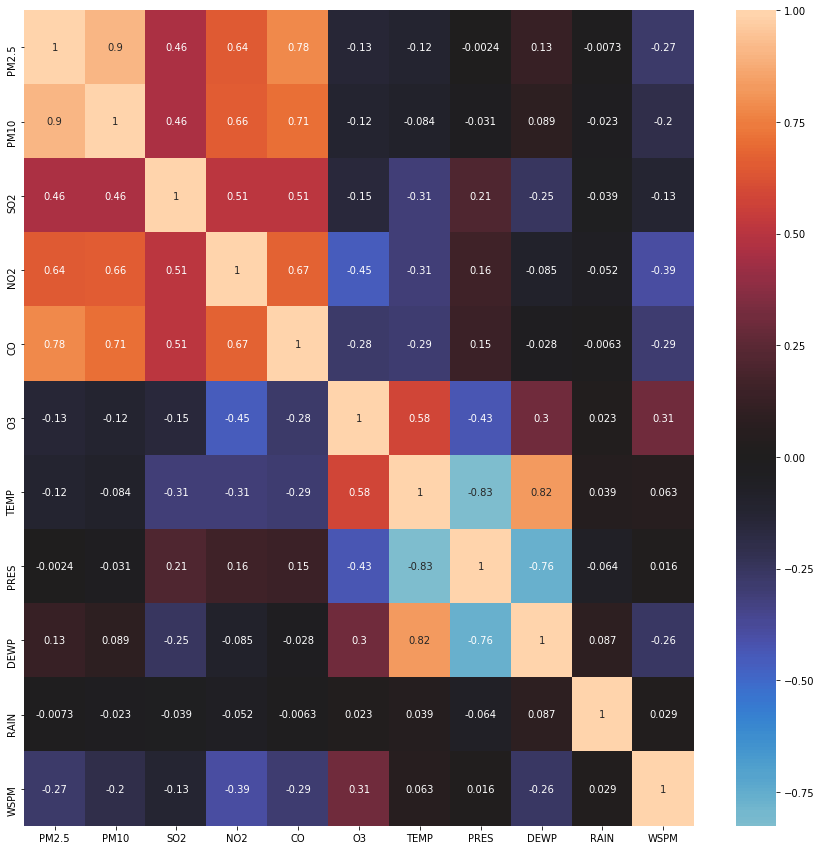

In [47]:
import seaborn

# plot pair wise data corration (pearson's method)
data_corr = data.corr()
plt.figure(figsize=(15,15))
seaborn.heatmap(data_corr, center=0, annot=True)

In [48]:
# some research suggest relationship bewteen PM2.5 and RH(relative humidity), let's convert Temperature
# and Dew point into RH
import math
# convert temp and dewp into RH
data_RH = data.copy()
data_RH['RH'] = data_RH.apply(lambda x: math.exp(17.27*x.DEWP/(237.7+x.DEWP)-17.27*x.TEMP/(237.7+x.TEMP)), axis=1)
data_RH.drop(columns=['TEMP', 'DEWP'], inplace=True)
data_RH

,PM2.5,PM10,SO2,NO2,CO,O3,PRES,RAIN,WSPM,RH
date,,,,,,,,,,
2013-03-01 00:00:00,3.0,6.0,3.0,8.0,300.0,44.0,1025.8,0.0,9.3,0.209222
2013-03-01 01:00:00,12.0,12.0,3.0,7.0,300.0,47.0,1026.1,0.0,9.4,0.197983
2013-03-01 02:00:00,14.0,14.0,NaN,7.0,200.0,22.0,1026.2,0.0,8.6,0.178054
2013-03-01 03:00:00,12.0,12.0,3.0,5.0,NaN,NaN,1027.3,0.0,6.6,0.178550
2013-03-01 04:00:00,12.0,12.0,3.0,NaN,200.0,11.0,1027.7,0.0,4.5,0.189187
...,...,...,...,...,...,...,...,...,...,...
2017-02-28 19:00:00,27.0,72.0,8.0,92.0,800.0,16.0,1014.2,0.0,1.8,0.188669
2017-02-28 20:00:00,47.0,55.0,17.0,86.0,1100.0,19.0,1014.5,0.0,1.5,0.238267
2017-02-28 21:00:00,18.0,28.0,4.0,30.0,500.0,64.0,1014.6,0.0,1.7,0.199573


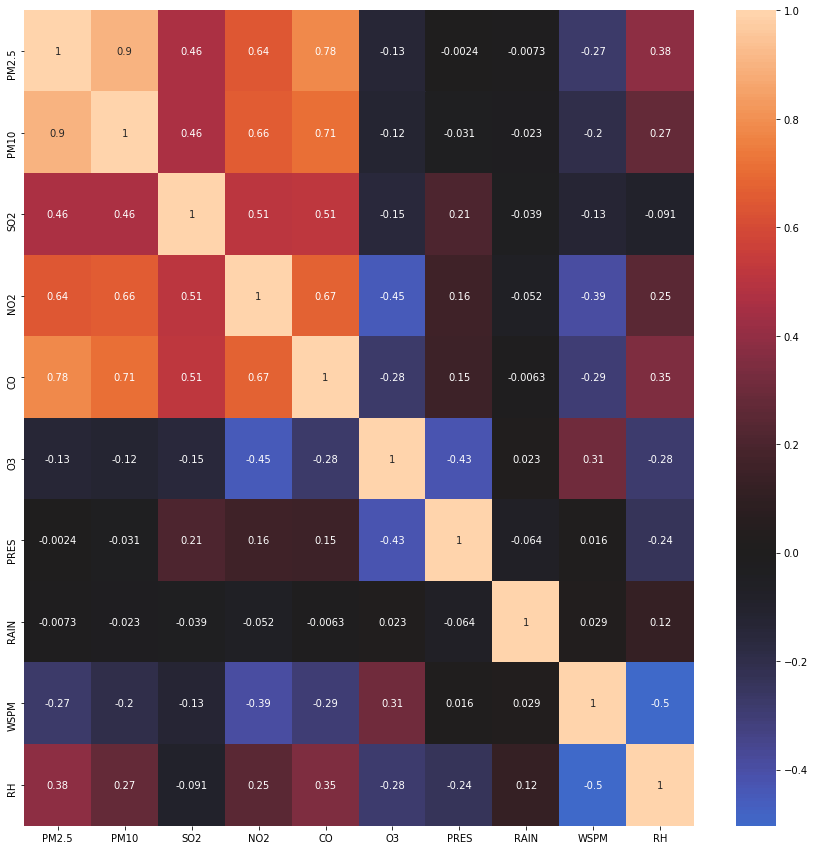

In [49]:
# plot the corr
data_RH_corr = data_RH.corr()
plt.figure(figsize=(15,15))
seaborn.heatmap(data_RH_corr, center=0, annot=True)

## Build the model

### Model 1
Note that all papers are talking about relationship between concertration of PM2.5 and other factors in **same time period!**

That means we can predict **current** PM2.5 if we have other data! Not exactly we want, but worth a try, maybe it is a good way to fill the NA in PM2.5 columns!

According to the papers and correlations examination, we pick up factors correlation coefficient > 0.5

Now we have our first model:

$PM_{2.5}=\alpha_1*PM_{10}+\alpha_2*NO_2+\alpha_3*CO+Background $

In [11]:
# see data first
data.dropna(inplace=True)
data

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
date,,,,,,,,,,,
2013-03-01 00:00:00,3.0,6.0,3.0,8.0,300.0,44.0,-0.9,1025.8,-20.5,0.0,9.3
2013-03-01 01:00:00,12.0,12.0,3.0,7.0,300.0,47.0,-1.1,1026.1,-21.3,0.0,9.4
2013-03-01 05:00:00,11.0,11.0,3.0,7.0,200.0,45.0,-2.8,1028.2,-22.1,0.0,1.7
2013-03-01 06:00:00,12.0,12.0,3.0,9.0,300.0,74.0,-4.0,1029.0,-21.2,0.0,1.6
2013-03-01 07:00:00,13.0,13.0,3.0,23.0,300.0,59.0,-2.4,1030.5,-21.3,0.0,1.7
...,...,...,...,...,...,...,...,...,...,...,...
2017-02-28 19:00:00,27.0,72.0,8.0,92.0,800.0,16.0,10.3,1014.2,-12.4,0.0,1.8
2017-02-28 20:00:00,47.0,55.0,17.0,86.0,1100.0,19.0,9.8,1014.5,-9.9,0.0,1.5
2017-02-28 21:00:00,18.0,28.0,4.0,30.0,500.0,64.0,9.1,1014.6,-12.7,0.0,1.7


In [51]:
data_model1 = data.copy()

# x1:PM10
X1 = data_model1['PM10'].to_numpy()
# x2:NO2
X2 = data_model1['NO2'].to_numpy()
# x3:CO
X3 = data_model1['CO'].to_numpy()

# observation
Y = data_model1['PM2.5'].to_numpy()

In [52]:
# Here, we believe that the observation, PM2.5, is a normal distribution that 
# mean is the value calculated by linear model. Also, the observation has noise sigma

import pymc3 as pm

with pm.Model() as pm25_model_1:
    alpha1 = pm.Normal('alpha1', mu=0, sd=10)
    alpha2 = pm.Normal('alpha2', mu=0, sd=10)
    alpha3 = pm.Normal('alpha3', mu=0, sd=10)
    c = pm.Normal('c', mu=0, sd=10)
    
    sigma = pm.HalfCauchy('sigma', beta=30)
    
    mu = alpha1 * X1 + alpha2 * X2 + alpha3 * X3 + c
    
    #'Y_obs', mu=mu, sd=sigma, observed=Y
    Y_obs = pm.Normal('Y_obs', mu=mu, sd=sigma, observed=Y)

In [53]:
with pm25_model_1:
    trace = pm.sample(3000, tune=1500, target_accept=0.9)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma, c, alpha3, alpha2, alpha1]
Sampling 2 chains: 100%|██████████| 9000/9000 [01:09<00:00, 128.59draws/s]


In [54]:
with pm25_model_1:
    posterior_predictive = pm.sample_posterior_predictive(trace)
    prior = pm.sample_prior_predictive()


100%|██████████| 6000/6000 [00:18<00:00, 325.97it/s]


array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a2b947950>,
      dtype=object)

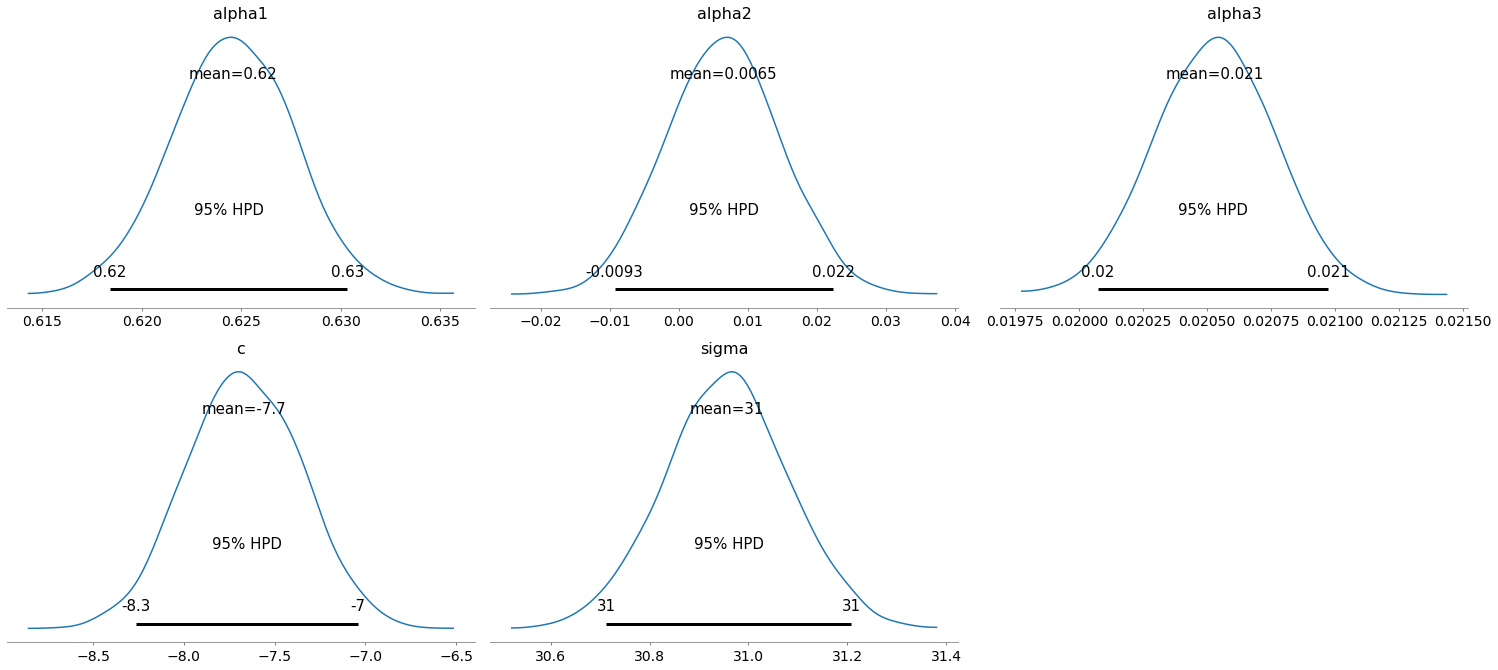

In [55]:
import arviz as az

with pm25_model_1:
    p = az.from_pymc3(trace=trace, prior=prior, posterior_predictive=posterior_predictive)
    
az.plot_posterior(p, round_to=2, credible_interval=0.95)

In [56]:
# model1: PM10, NO2, CO
def model1 (X1, X2, X3):
    return 0.62 * X1 + 0.0065 * X2 + 0.021 * X3 - 7.7

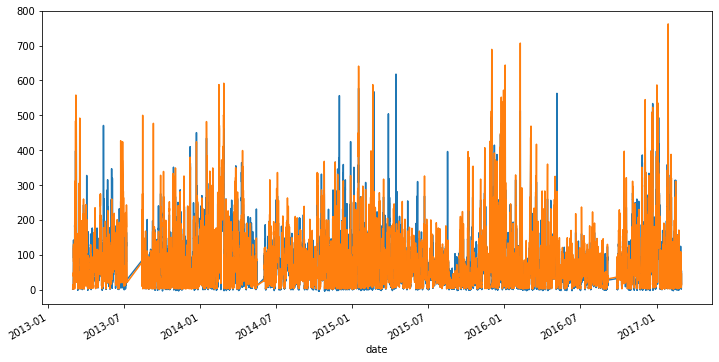

In [57]:
data_model1['prediction'] = data_model1.apply(lambda x: model1(x.PM10, x.NO2, x.CO), axis=1)
data_model1.prediction.plot()
data_model1['PM2.5'].plot(figsize=(12,6))

In [58]:
error1 = sum([(data_model1['PM2.5'][i]-data_model1['prediction'][i])**2 for i in range(0,len(data_model1))])
error1

29307388.860092055

In [59]:
data_model1['error'] = data_model1.apply(lambda x: abs(x['PM2.5']-x['prediction'])/x['PM2.5'], axis=1)
data_model1['error'].describe()

count    30587.000000
mean         0.469095
std          1.128961
min          0.000015
25%          0.115507
50%          0.238010
75%          0.461812
max         60.597333
Name: error, dtype: float64

### Some comments:
In fact we have tried to add the SO2 and RH into model(casue their correlation coefficient are relative high!), the result shows no obvious difference, see notebook 'Bayesian Inference-Theoretical model.ipynb' for detail.

The model turned out to be:

0.61 * X1 + 38 * X2 + 0.14 * X3 - 0.039 * X4 + 0.018 * X5 - 23

(x1:PM10  x2:RH  x3:SO2  x4:NO2  x5:CO)

error = 27039733.21118023

mean         0.550454<br>
std          1.141666<br>
min          0.000015<br>
25%          0.113322<br>
50%          0.246551<br>
75%          0.594257<br>
max         59.221920<br>

### Model 2

What if we want to make prediction, say--1 hour later. **What's the concetration of PM2.5 1 hour later given the other data currently?**

First, let's try the same way as the model1, but now the observation should be PM2.5 1 Hour later


In [12]:
data_1hour = data.copy()
data_1hour['PM2.5(t+1)'] = data_1hour['PM2.5'].shift(periods=-1)
data_1hour = data_1hour.dropna()
data_1hour

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM,PM2.5(t+1)
date,,,,,,,,,,,,
2013-03-01 00:00:00,3.0,6.0,3.0,8.0,300.0,44.0,-0.9,1025.8,-20.5,0.0,9.3,12.0
2013-03-01 01:00:00,12.0,12.0,3.0,7.0,300.0,47.0,-1.1,1026.1,-21.3,0.0,9.4,11.0
2013-03-01 05:00:00,11.0,11.0,3.0,7.0,200.0,45.0,-2.8,1028.2,-22.1,0.0,1.7,12.0
2013-03-01 06:00:00,12.0,12.0,3.0,9.0,300.0,74.0,-4.0,1029.0,-21.2,0.0,1.6,13.0
2013-03-01 07:00:00,13.0,13.0,3.0,23.0,300.0,59.0,-2.4,1030.5,-21.3,0.0,1.7,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2017-02-28 18:00:00,15.0,35.0,6.0,39.0,500.0,67.0,12.6,1013.5,-11.9,0.0,1.3,27.0
2017-02-28 19:00:00,27.0,72.0,8.0,92.0,800.0,16.0,10.3,1014.2,-12.4,0.0,1.8,47.0
2017-02-28 20:00:00,47.0,55.0,17.0,86.0,1100.0,19.0,9.8,1014.5,-9.9,0.0,1.5,18.0


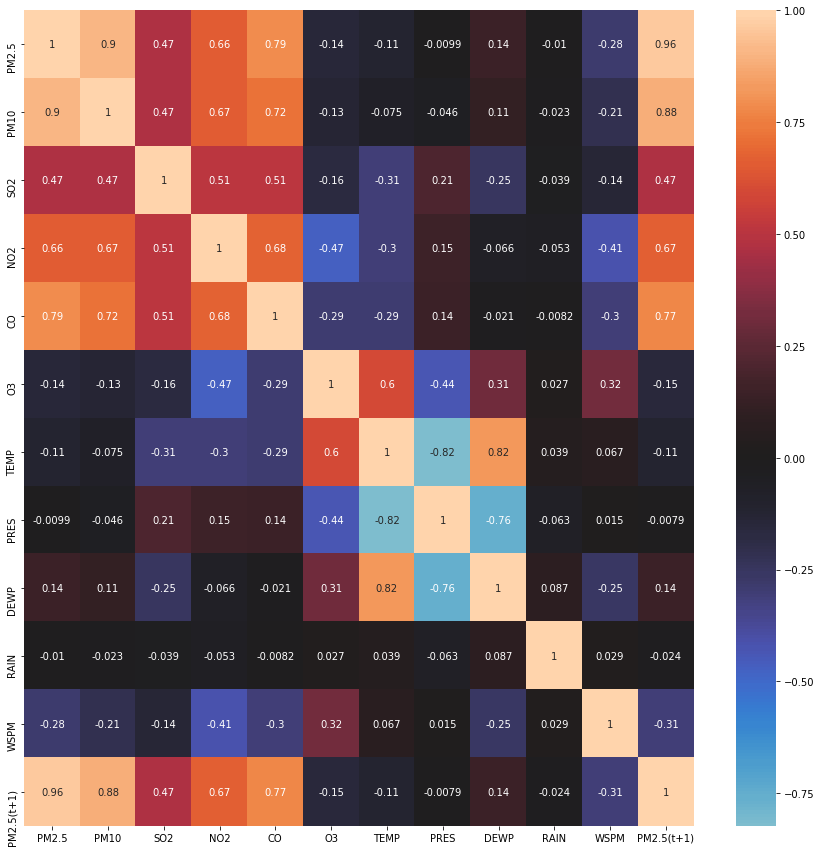

In [63]:
import seaborn
data_1hour_corr = data_1hour.corr()
plt.figure(figsize=(15,15))
seaborn.heatmap(data_1hour_corr, center=0, annot=True)

In [64]:
# x1:PM10
X1 = data_1hour['PM10'].to_numpy()
# x2:NO2
X2 = data_1hour['NO2'].to_numpy()
# x3:CO
X3 = data_1hour['CO'].to_numpy()

# observation
Y = data_1hour['PM2.5(t+1)'].to_numpy()

In [65]:

import pymc3 as pm

with pm.Model() as pm25_model_2:
    alpha1 = pm.Normal('alpha1', mu=0, sd=10)
    alpha2 = pm.Normal('alpha2', mu=0, sd=10)
    alpha3 = pm.Normal('alpha3', mu=0, sd=10)
    c = pm.Normal('c', mu=0, sd=10)
    
    sigma = pm.HalfCauchy('sigma', beta=30)
    
    mu = alpha1 * X1 + alpha2 * X2 + alpha3 * X3 + c
    
    #'Y_obs', mu=mu, sd=sigma, observed=Y
    Y_obs = pm.Normal('Y_obs', mu=mu, sd=sigma, observed=Y)

In [66]:
with pm25_model_2:
    trace2 = pm.sample(3000, tune=1500, target_accept=0.9)


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma, c, alpha3, alpha2, alpha1]
Sampling 2 chains: 100%|██████████| 9000/9000 [01:36<00:00, 92.99draws/s] 


In [67]:
with pm25_model_2:
    posterior_predictive2 = pm.sample_posterior_predictive(trace2)
    prior2 = pm.sample_prior_predictive()

100%|██████████| 6000/6000 [00:17<00:00, 345.19it/s]


array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a2f260590>,
      dtype=object)

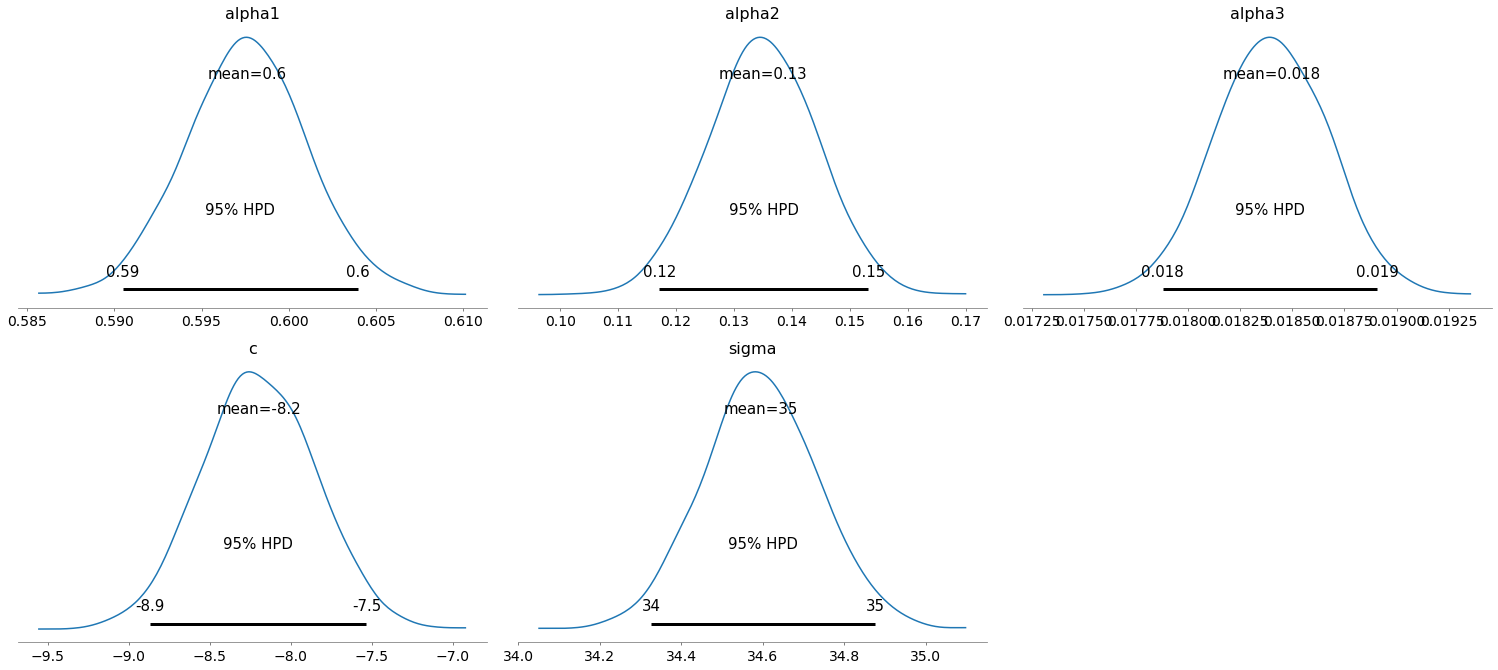

In [68]:
import arviz as az

with pm25_model_2:
    p2 = az.from_pymc3(trace=trace2, prior=prior2, posterior_predictive=posterior_predictive2)
    
az.plot_posterior(p2, round_to=2, credible_interval=0.95)

In [13]:
# model2: PM10, NO2, CO
def model2 (X1, X2, X3):
    return 0.6 * X1 + 0.13 * X2 + 0.018 * X3 - 8.2

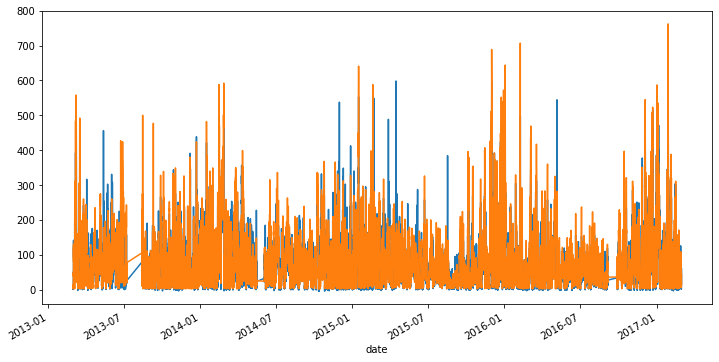

In [14]:
data_1hour['prediction'] = data_1hour.apply(lambda x: model2(x.PM10, x.NO2, x.CO), axis=1)
data_1hour.prediction.plot()
data_1hour['PM2.5(t+1)'].plot(figsize=(12,6))

In [15]:
error2 = sum([(data_1hour['PM2.5(t+1)'][i]-data_1hour['prediction'][i])**2 for i in range(0,data_1hour.shape[0])])
error2

36610240.178436264

In [16]:
data_1hour['error'] = data_1hour.apply(lambda x: abs(x['PM2.5(t+1)']-x['prediction'])/x['PM2.5(t+1)'], axis=1)
data_1hour['error'].describe()

count    30586.000000
mean         0.541688
std          1.490858
min          0.000000
25%          0.126667
50%          0.260688
75%          0.514162
max        100.380000
Name: error, dtype: float64

### Model3
Model 2 seems like working, we can make a rough prediction of 1 hour later based on this simple linear model, but **is there any improvement**?

Note that in EDA, we found that this data has seasonality, so why not make model for each season?

Take the winter(Nov~March) for example

In [73]:
def winter(m):
    
    return [True if (month == 11 or month == 12 or month == 1 or month == 2 or month == 3) else False for month in m]

In [76]:
data_model3 = data_1hour.drop(columns=['prediction', 'error'])
data_model3 = data_model3[winter(data_model3.index.month)]

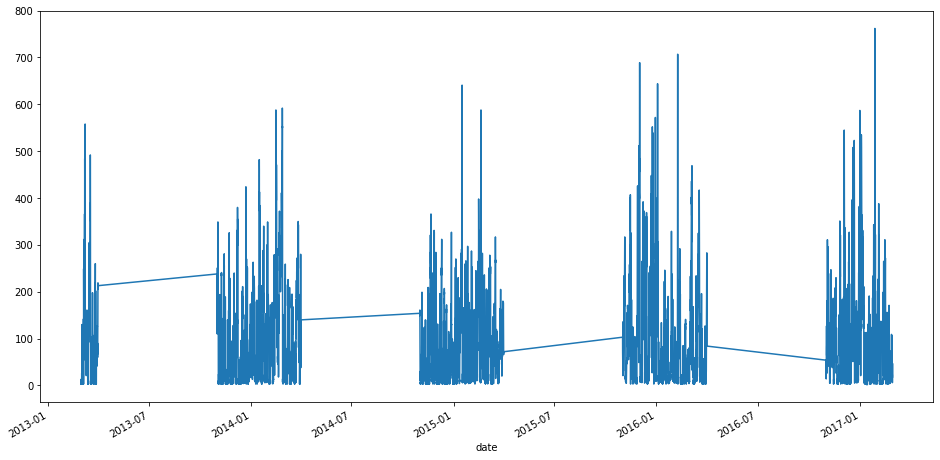

In [77]:
data_model3['PM2.5'].plot(figsize=(16,8))

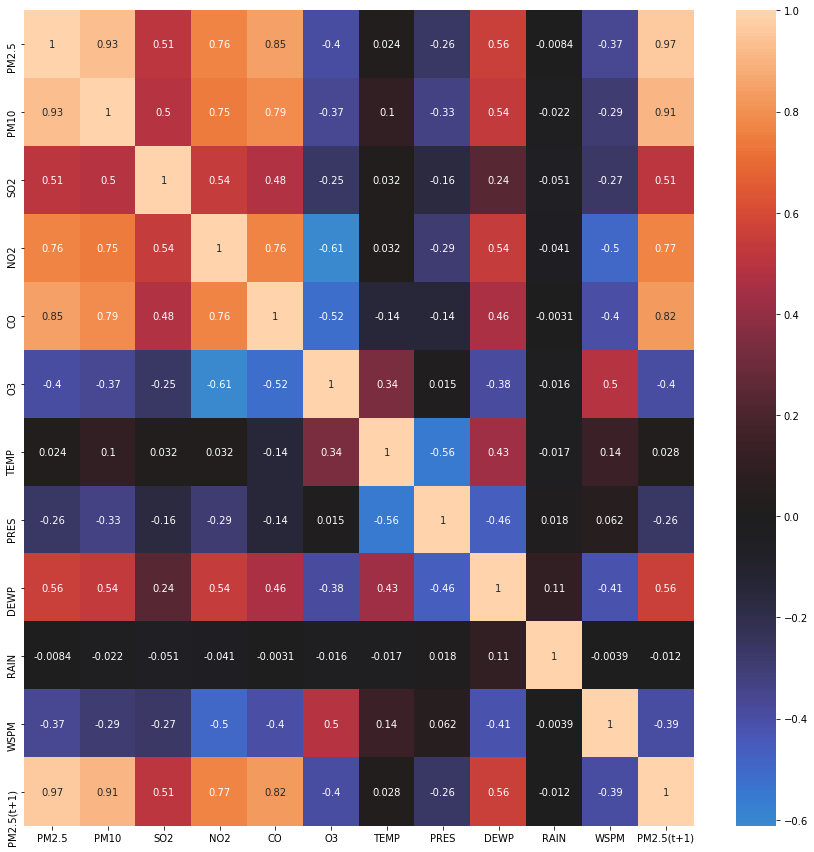

In [78]:
import seaborn
data_winter_corr = data_model3.corr()
plt.figure(figsize=(15,15))
seaborn.heatmap(data_winter_corr, center=0, annot=True)

In [80]:

# x1:PM10
X1 = data_model3['PM10'].to_numpy()
# x2:NO2
X2 = data_model3['NO2'].to_numpy()
# x3:CO
X3 = data_model3['CO'].to_numpy()
# x4:SO2
X4 = data_model3['SO2'].to_numpy()
# x5:DEWP
X5 = data_model3['DEWP'].to_numpy()

# observation
Y = data_model3['PM2.5(t+1)'].to_numpy()

In [81]:
import pymc3 as pm

with pm.Model() as pm25_model_3:
    alpha1 = pm.Normal('alpha1', mu=0, sd=10)
    alpha2 = pm.Normal('alpha2', mu=0, sd=10)
    alpha3 = pm.Normal('alpha3', mu=0, sd=10)
    alpha4 = pm.Normal('alpha4', mu=0, sd=10)
    alpha5 = pm.Normal('alpha5', mu=0, sd=10)
    c = pm.Normal('c', mu=0, sd=10)
    
    sigma = pm.HalfCauchy('sigma', beta=50)
    
    mu = alpha1 * X1 + alpha2 * X2 + alpha3 * X3 + alpha4 * X4 + alpha5 * X5 + c
    
    #'Y_obs', mu=mu, sd=sigma, observed=Y
    Y_obs = pm.Normal('Y_obs', mu=mu, sd=sigma, observed=Y)

In [82]:
with pm25_model_3:
    trace3 = pm.sample(3000, tune=1500, target_accept=0.9)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma, c, alpha5, alpha4, alpha3, alpha2, alpha1]
Sampling 2 chains: 100%|██████████| 9000/9000 [01:16<00:00, 117.08draws/s]


In [83]:
with pm25_model_3:
    posterior_predictive3 = pm.sample_posterior_predictive(trace3)
    prior3 = pm.sample_prior_predictive()

100%|██████████| 6000/6000 [00:10<00:00, 561.65it/s]


array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a332979d0>,
      dtype=object)

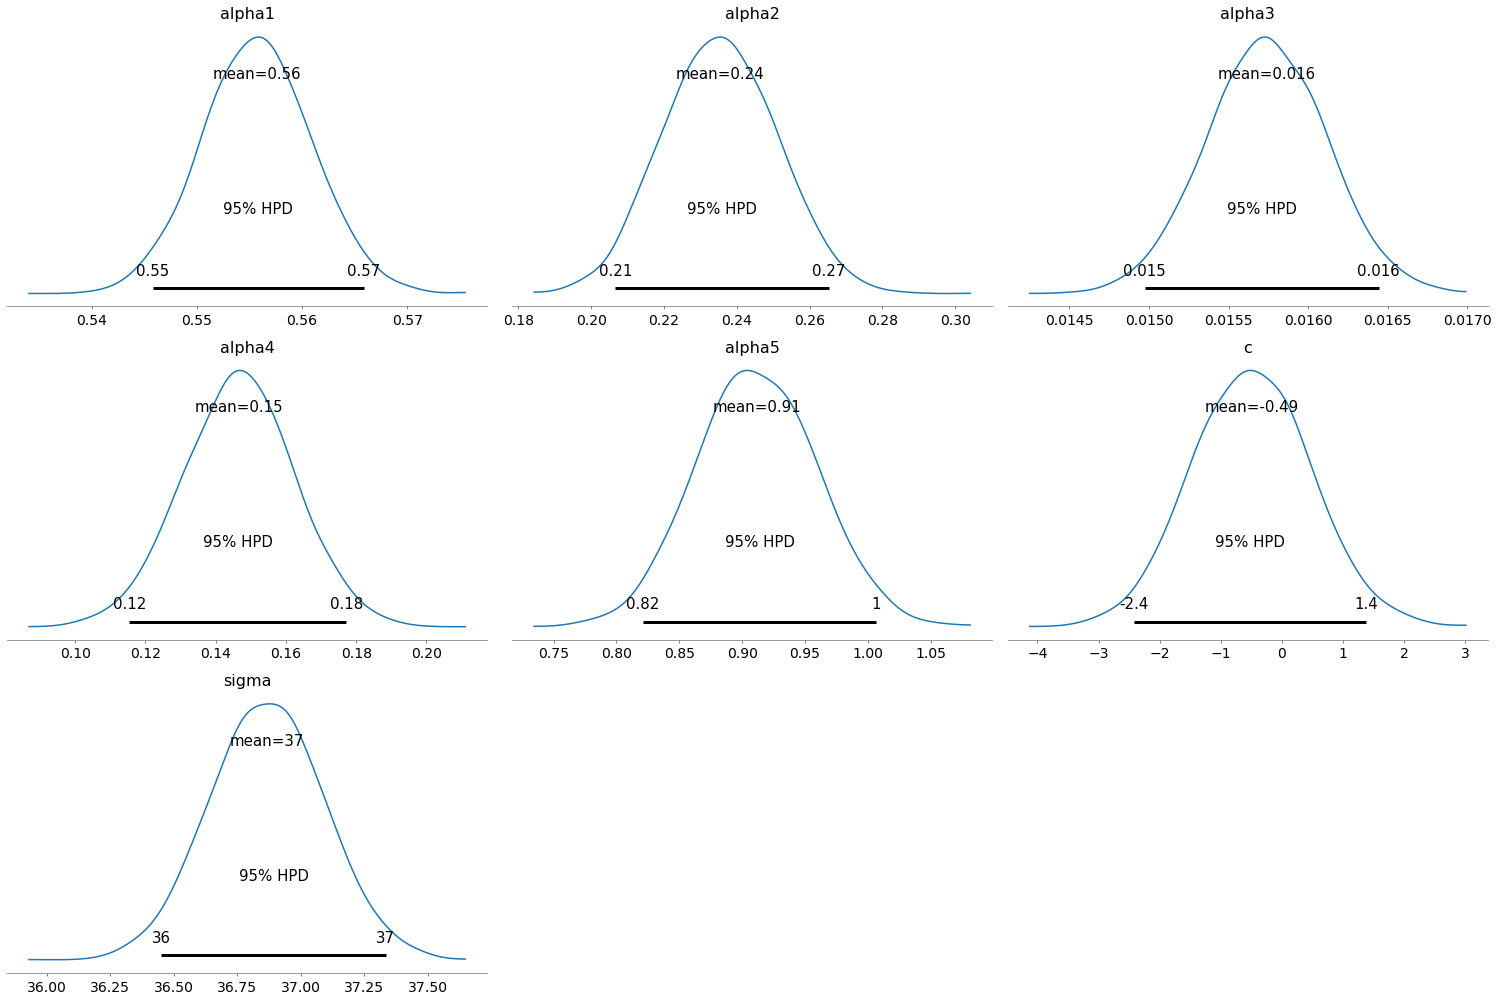

In [84]:
import arviz as az

with pm25_model_3:
    p3 = az.from_pymc3(trace=trace3, prior=prior3, posterior_predictive=posterior_predictive3)
    
az.plot_posterior(p3, round_to=2, credible_interval=0.95)

In [85]:
# model3: PM10, NO2, CO, SO2, DEWP
def model3 (X1, X2, X3, X4, X5):
    return 0.56 * X1 + 0.24 * X2 + 0.016 * X3 + 0.15 * X4 + 0.91 * X5 - 0.49

In [87]:
data_model3['prediction'] = data_model3.apply(lambda x: model3(x.PM10, x.NO2, x.CO, x.SO2, x.DEWP), axis=1)

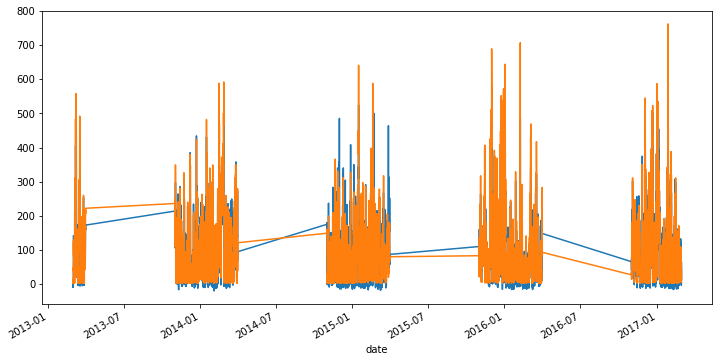

In [89]:
data_model3.prediction.plot()
data_model3['PM2.5(t+1)'].plot(figsize=(12,6))

In [90]:
data_model3['error'] = data_model3.apply(lambda x: abs(x['PM2.5(t+1)']-x['prediction'])/x['PM2.5(t+1)'], axis=1)
data_model3['error'].describe()

count    13521.000000
mean         0.702869
std          1.605369
min          0.000121
25%          0.125053
50%          0.286940
75%          0.757933
max         80.940000
Name: error, dtype: float64

No bad, but still no improvement. Actually, when will add more variable into to model, there is a chance that they are not linear at all!

### Model 4
There are many outlier in winter's data, why not try studentT?


In [91]:
import pymc3 as pm

with pm.Model() as pm25_model_4:
    alpha1 = pm.Normal('alpha1', mu=0, sd=10)
    alpha2 = pm.Normal('alpha2', mu=0, sd=10)
    alpha3 = pm.Normal('alpha3', mu=0, sd=10)
    alpha4 = pm.Normal('alpha4', mu=0, sd=10)
    alpha5 = pm.Normal('alpha5', mu=0, sd=10)
    c = pm.Normal('c', mu=0, sd=10)
    
    sigma = pm.HalfCauchy('sigma', beta=30)
    nu = pm.Uniform('nu', 0, 10)
    
    mu = alpha1 * X1 + alpha2 * X2 + alpha3 * X3 + alpha4 * X4 + alpha5 * X5 + c
    
    #'Y_obs', mu=mu, sd=sigma, observed=Y
    Y_obs = pm.StudentT('Y_obs', nu, mu=mu, sd=sigma, observed=Y)

In [92]:
with pm25_model_4:
    trace4 = pm.sample(3000, tune=2000, target_accept=0.9)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [nu, sigma, c, alpha5, alpha4, alpha3, alpha2, alpha1]
Sampling 2 chains: 100%|██████████| 10000/10000 [02:03<00:00, 80.85draws/s]


In [93]:
with pm25_model_4:
    posterior_predictive4 = pm.sample_posterior_predictive(trace4)
    prior4 = pm.sample_prior_predictive()

100%|██████████| 6000/6000 [00:26<00:00, 230.56it/s]


array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a41672ed0>,
      dtype=object)

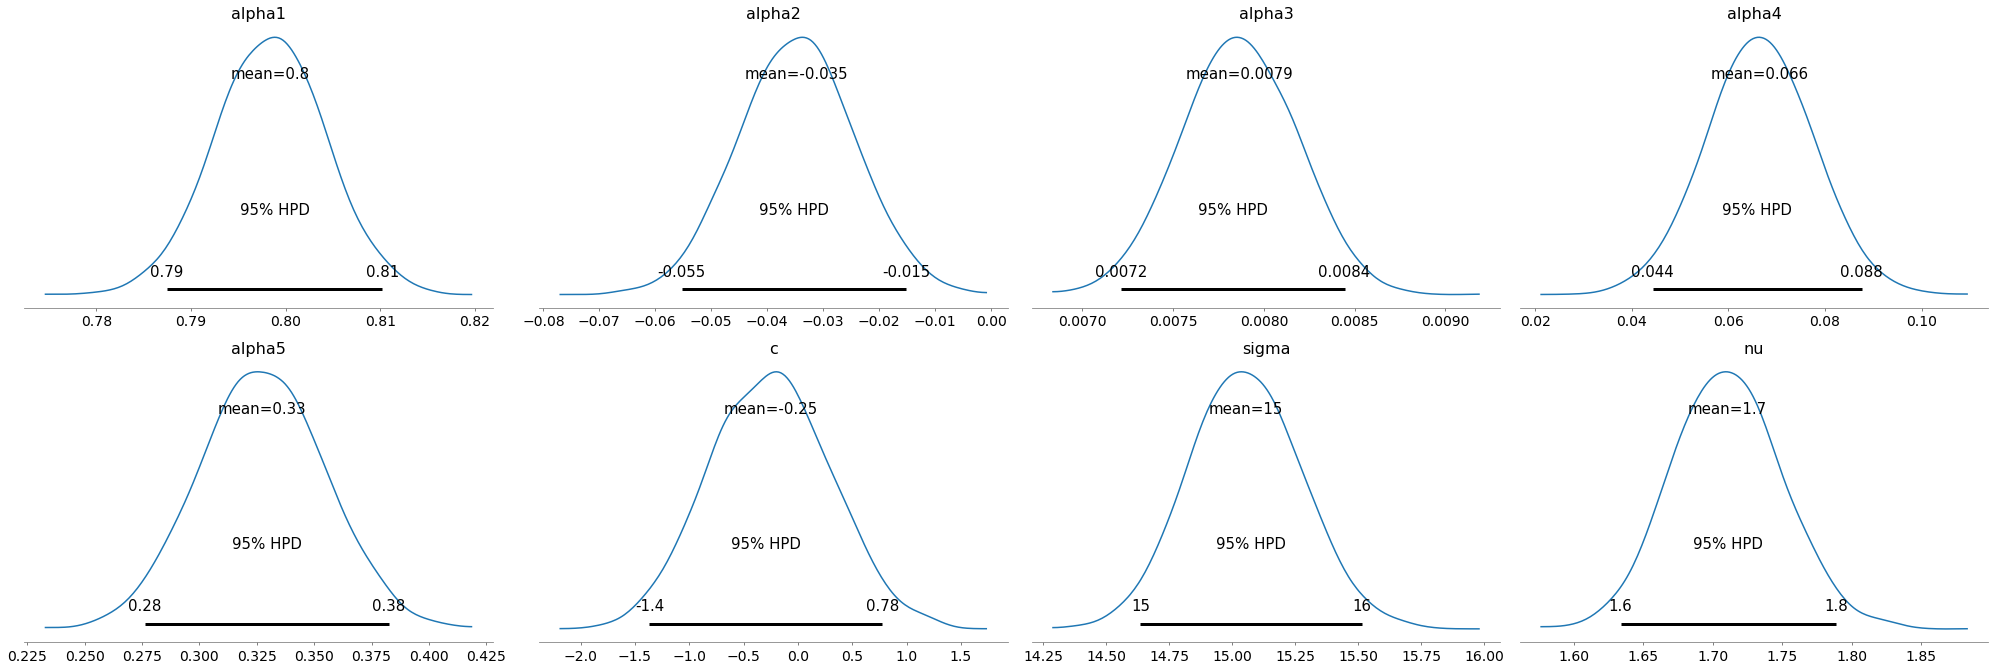

In [94]:
import arviz as az

with pm25_model_4:
    p4 = az.from_pymc3(trace=trace4, prior=prior4, posterior_predictive=posterior_predictive4)
    
az.plot_posterior(p4, round_to=2, credible_interval=0.95)

In [95]:
# model4: PM10, NO2, CO, SO2, DEWP
def model4 (X1, X2, X3, X4, X5):
    return 0.8 * X1 - 0.035 * X2 + 0.0079 * X3 + 0.066 * X4 + 0.33 * X5 - 0.25

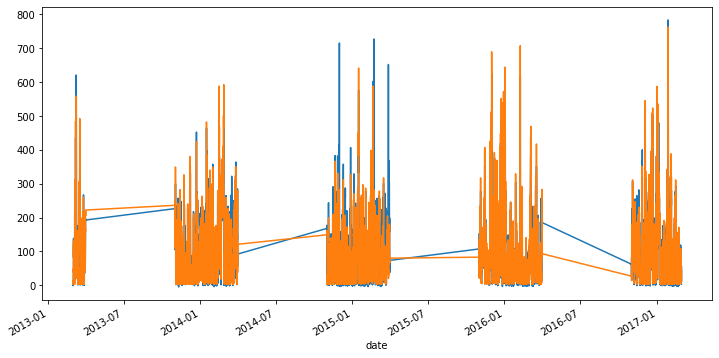

In [96]:
data_model4 = data_model3.copy()
data_model4['prediction'] = data_model4.apply(lambda x: model4(x.PM10, x.NO2, x.CO, x.SO2, x.DEWP), axis=1)
data_model4.prediction.plot()
data_model4['PM2.5(t+1)'].plot(figsize=(12,6))

In [97]:
data_model4['error'] = data_model4.apply(lambda x: abs(x['PM2.5(t+1)']-x['prediction'])/x['PM2.5(t+1)'], axis=1)
data_model4['error'].describe()

count    13521.000000
mean         0.648868
std          1.977534
min          0.000049
25%          0.102318
50%          0.238162
75%          0.573824
max         92.802000
Name: error, dtype: float64

## Conclusion

The linear model, which is better than HMM model, is still has limitation. In other word, maybe they are not linear 
at all!

At this point, to make more precise prediction, We need something more powerful. That is Random forest and ANN come into play